## SC1015 Mini Assignment Team 8
#### William Johnson U2220859A
#### Soo Ying Xi U2220021D
#### Tay Zhi Xian U2220099F
------------------------------------

#### Import Essential Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score,precision_score,recall_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

#Shows plots by default
%matplotlib inline

------------------------------------------
#### Importing the dataset

In [61]:
creditcardData=pd.read_csv("credit-approval_csv.csv")
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [62]:
creditcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

#### Observations
1. There are `17` variables in total and `690` observations in the dataset. Approved_Status is the response variable
2.  The remaining 15 variables are likely predictors (We've excluded Approved as it is the same as Approved_Status)
3. There are `2` variables identified as `int64` by default, and it seems they are all Numeric with the exception of `CreditScore - Categorical`.
4. There are `4` variables identified as `float64` by default, and it seems they are indeed Numeric.     
5. There are `9` variables identified as `object` by default, and they are most likely Categorical (Excluding `Approved`) 

6. There are some NULL values in the dataset, we need to explore more on those predictors to decide:
- To drop all the NULL values   OR
- fill the NULL values with median or mode

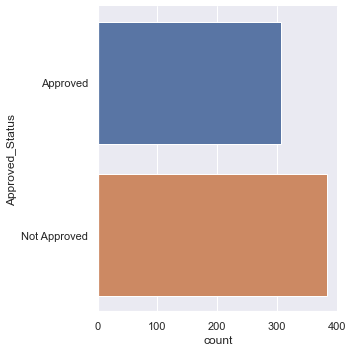

In [63]:
sb.catplot(y="Approved_Status",data=creditcardData,kind="count")

In [64]:
No_notapproved,No_approved=creditcardData["Approved_Status"].value_counts()
print("Ratio of Approved:Not_Approved=",No_approved,":",No_notapproved)
print("Approved percentage: {0:.2f} %".format((No_approved/(No_notapproved+No_approved))*100))

Ratio of Approved:Not_Approved= 307 : 383
Approved percentage: 44.49 %


We see that the percentage of approved credit card is  44.49%, which is slightly less than 50%. Generally it seems that response variable is balanced. Next, we will need to explore the data to identify each variables' relation with Approved_Status.

---

### Exploratory Data Analysis

#### Exploring the numerical variables

In [65]:
creditcardData.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Exploration of variable `Debt`

<AxesSubplot:xlabel='Debt', ylabel='Approved_Status'>

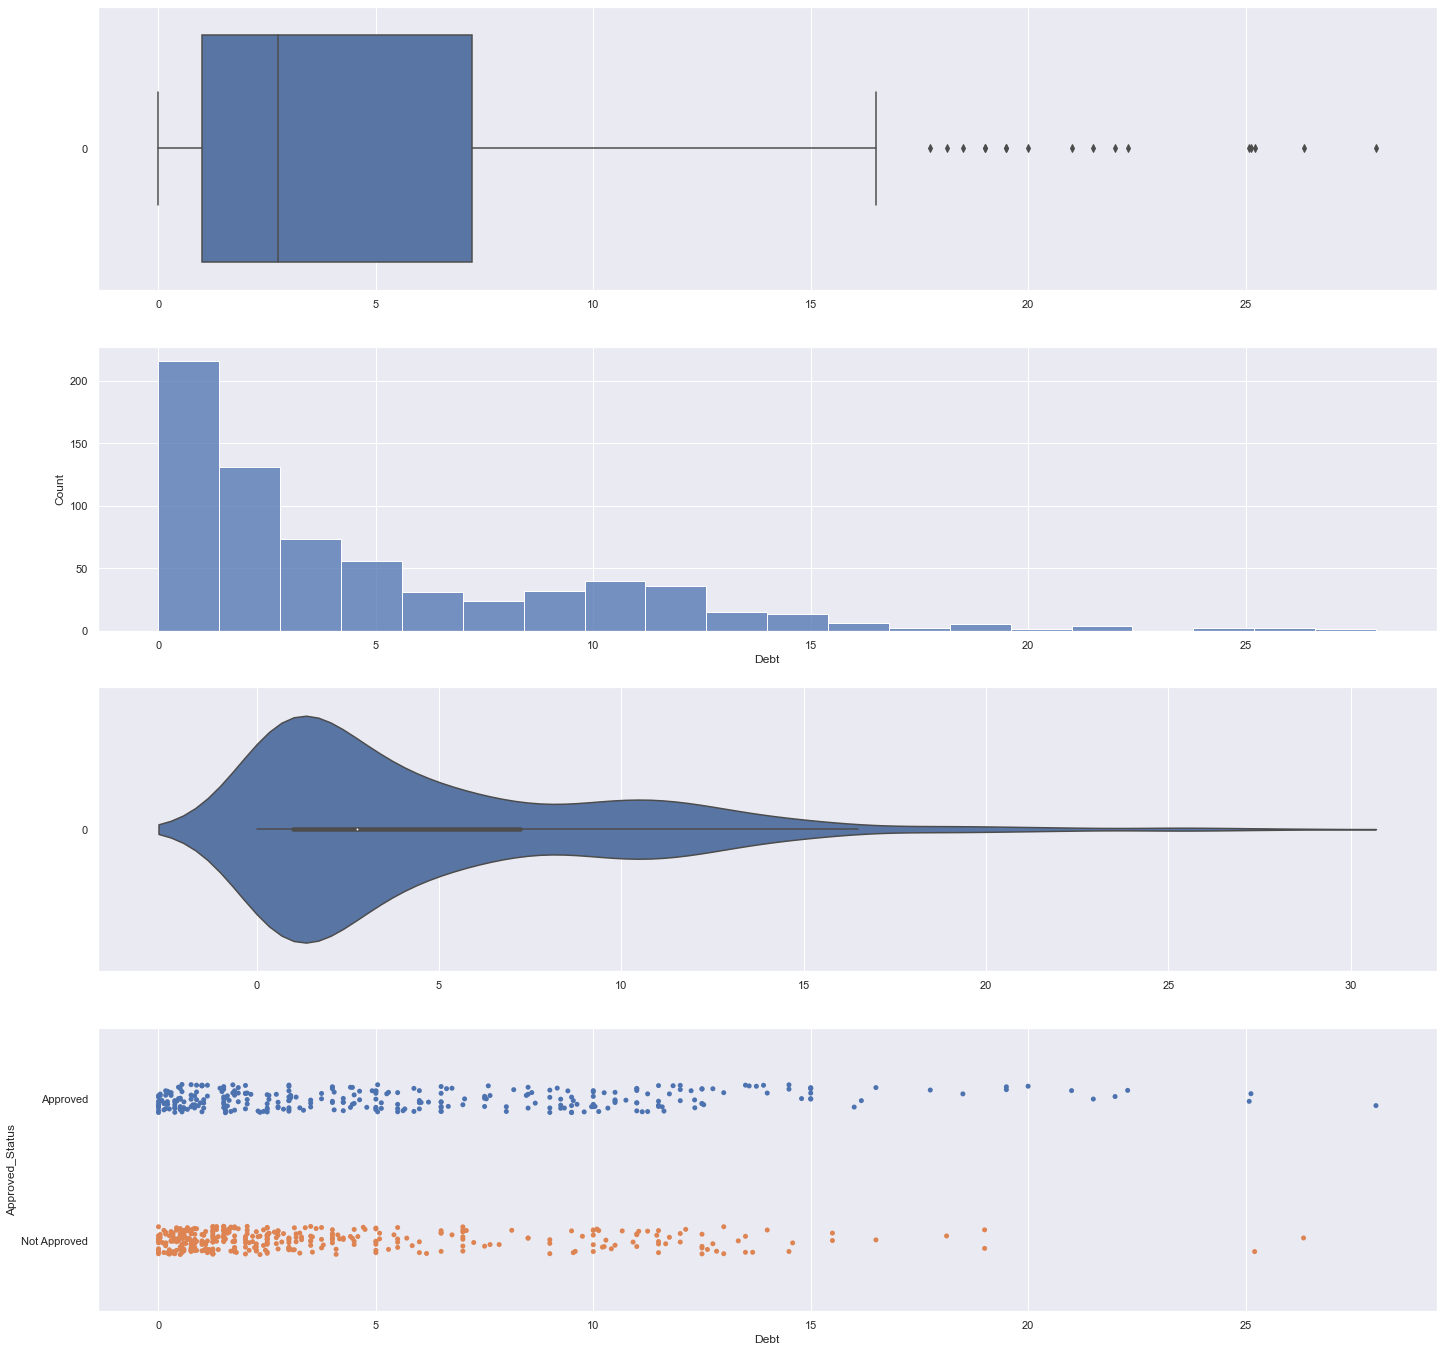

In [66]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Debt'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Debt'], ax = axes[1])
sb.violinplot(data = creditcardData['Debt'], orient = "h", ax = axes[2])
sb.stripplot(x = 'Debt', y = 'Approved_Status', data = creditcardData, ax = axes[3])

From the strip plot, while there are less approved applicants with a higher `Debt`, the general trend for both `Approved` and `Not Approved` are similar.
This variable does not seem to have a strong relationship with `Approved_Status`.

Exploration of variable `YearsEmployed`

<AxesSubplot:xlabel='YearsEmployed', ylabel='Approved_Status'>

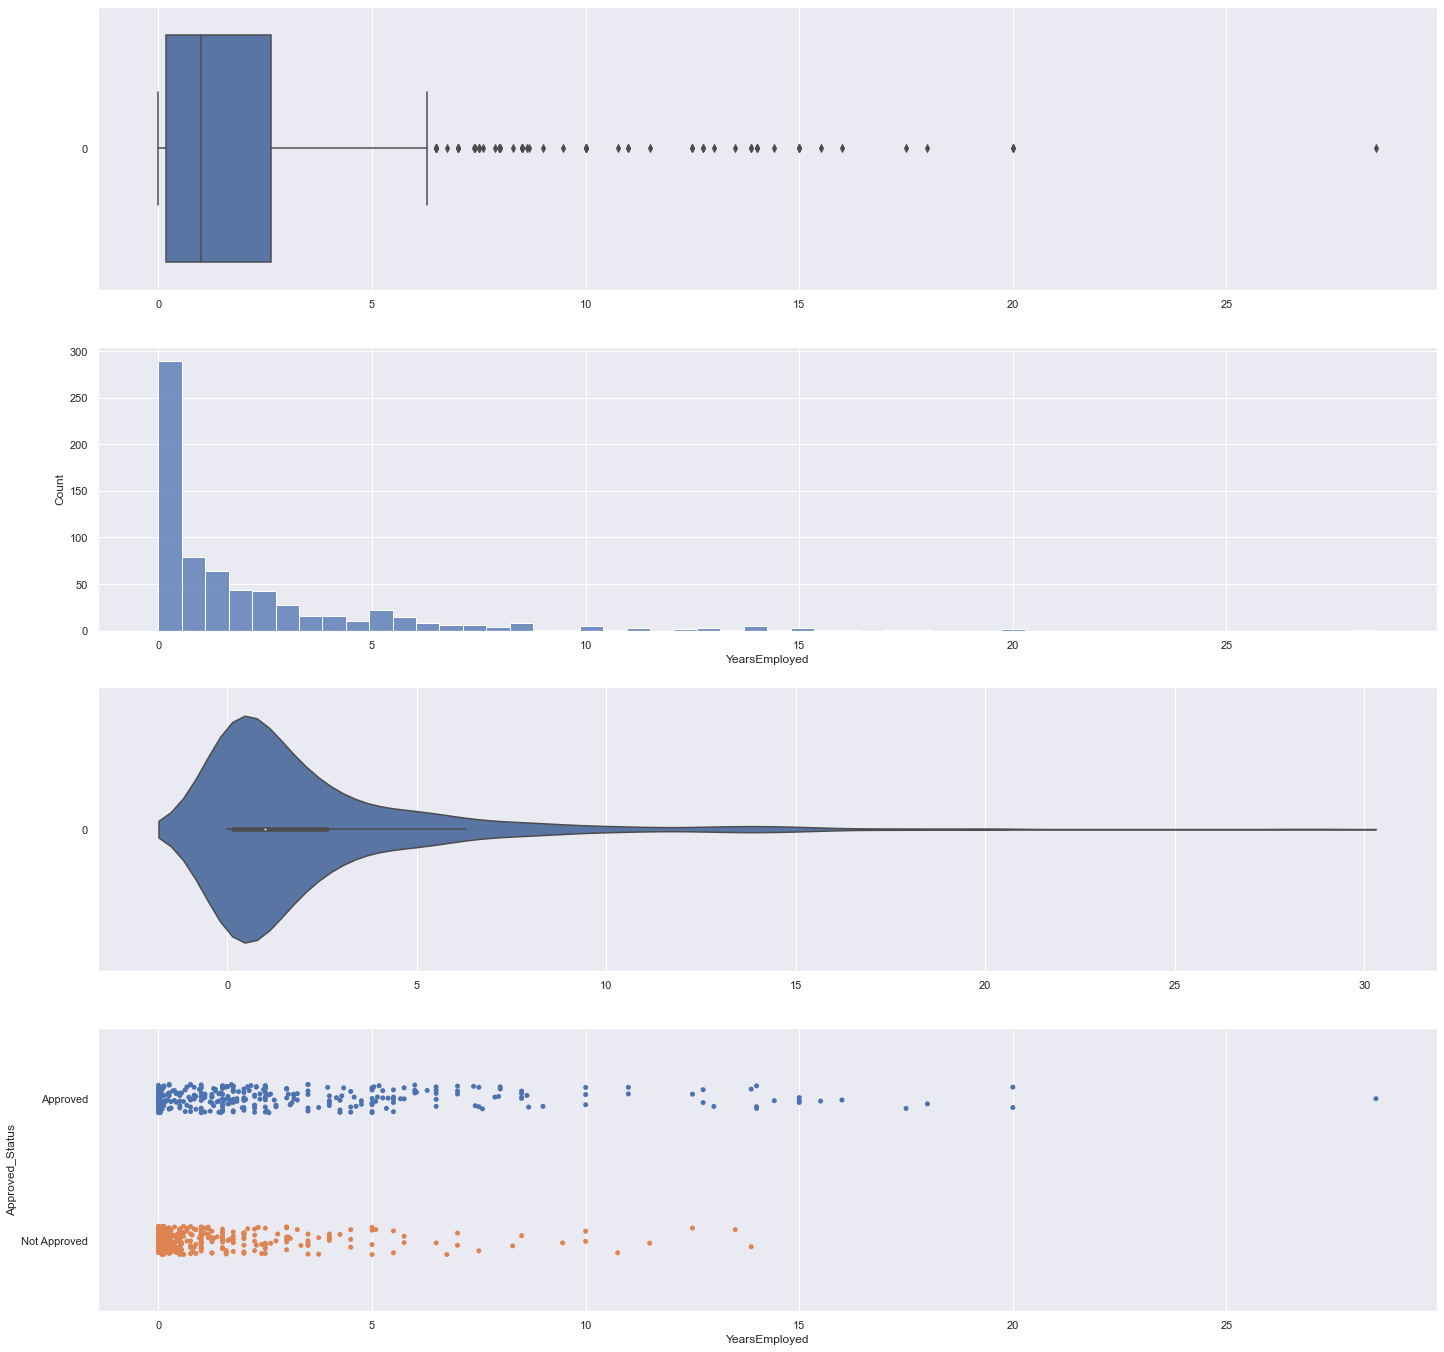

In [67]:
# Plot basic uni-variate figures
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['YearsEmployed'], ax = axes[1])
sb.violinplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[2])
sb.stripplot(x = 'YearsEmployed', y = 'Approved_Status', data = creditcardData, ax = axes[3])

In [68]:
MaxNotApprovedYE = creditcardData[creditcardData['Approved_Status'] == 'Not Approved']['YearsEmployed'].max()
print("The largest YearsEmployed value in Not Approved is:", MaxNotApprovedYE)

The largest YearsEmployed value in Not Approved is: 13.875


From the strip plot, there are significantly more approved applicants with a higher `YearsEmployed`. In addition, `Not Approved` applicants only have a maximum of ~14 years of employment, suggesting a strong relationship between `YearsEmployed` and `Approved_Status`.

Exploration of variable `Age`

<AxesSubplot:xlabel='Age', ylabel='Approved_Status'>

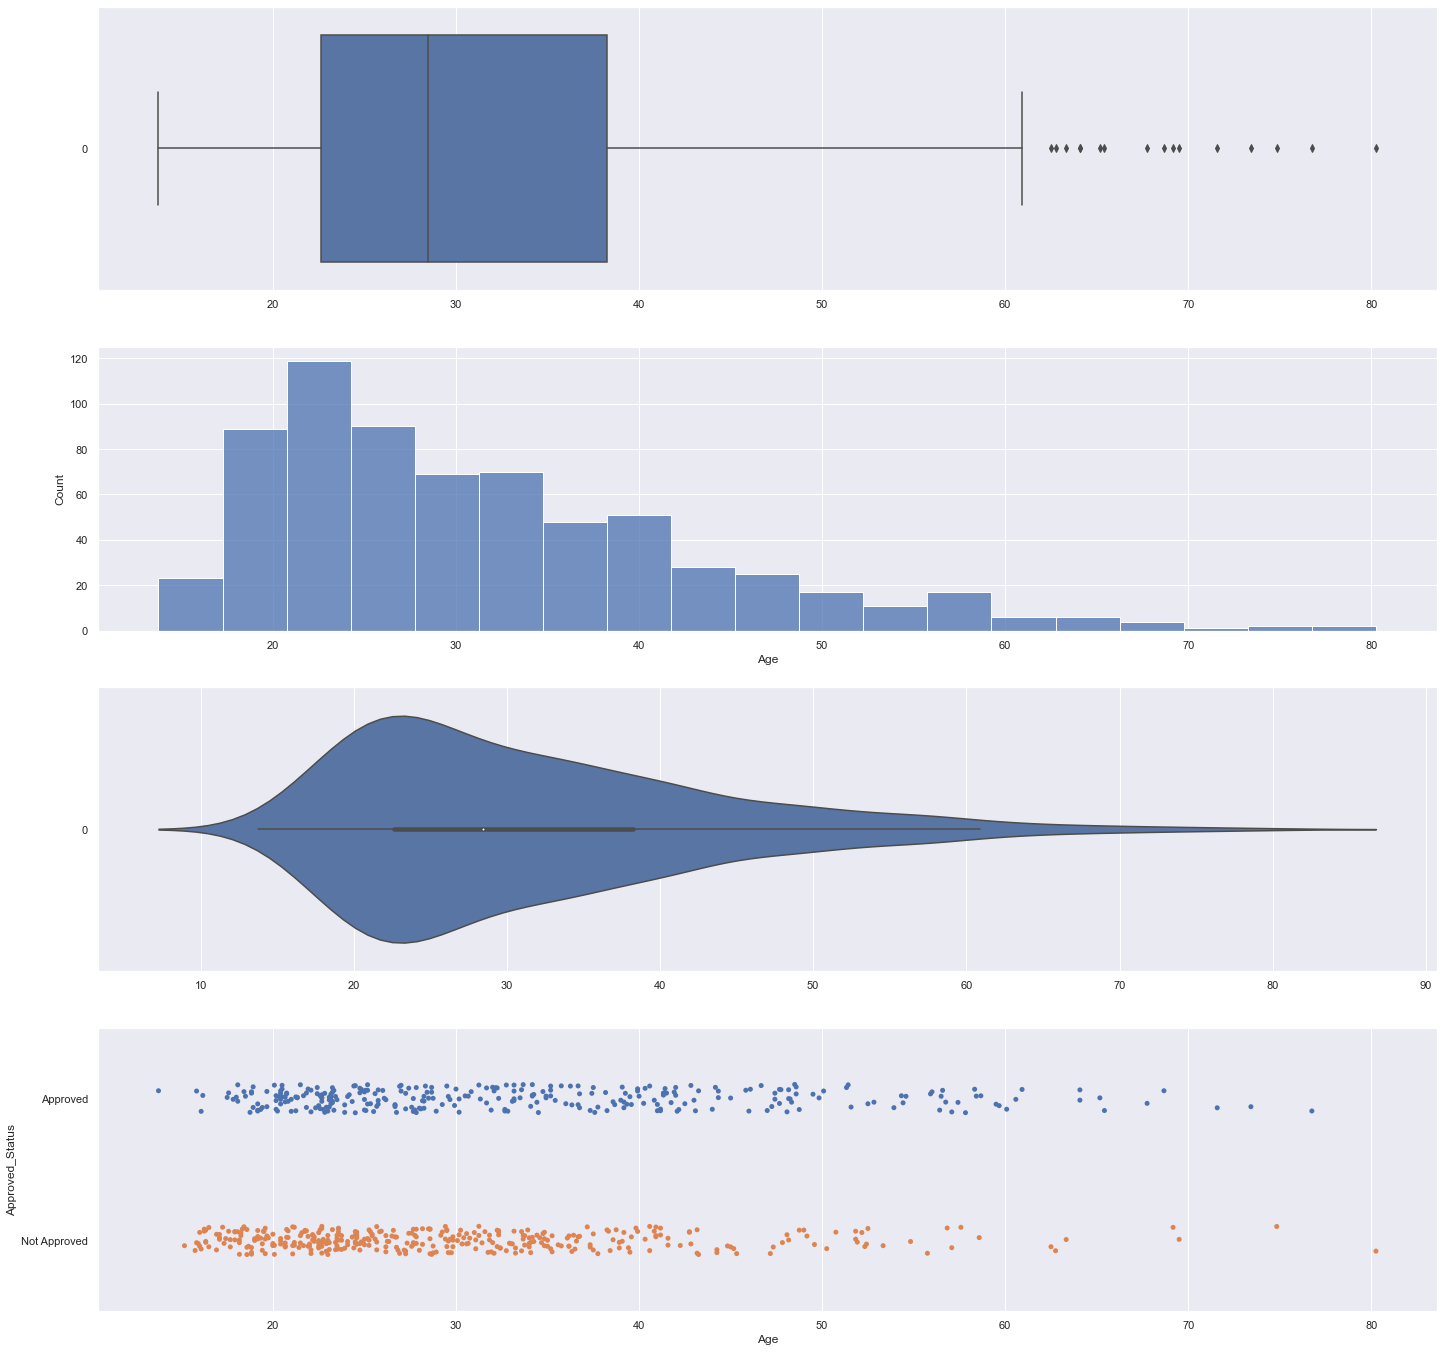

In [69]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Age'], ax = axes[1])
sb.violinplot(data = creditcardData['Age'], orient = "h", ax = axes[2])
sb.stripplot(x = 'Age', y = 'Approved_Status', data = creditcardData, ax = axes[3])

From the strip plot, while there are slightly less approved applicants with a higher `Age`, the general trend for both `Approved` and `Not Approved` are similar.
This variable does not seem to have a strong relationship with `Approved_Status`.

Exploration of variable `CreditScore`

<AxesSubplot:xlabel='CreditScore', ylabel='Approved_Status'>

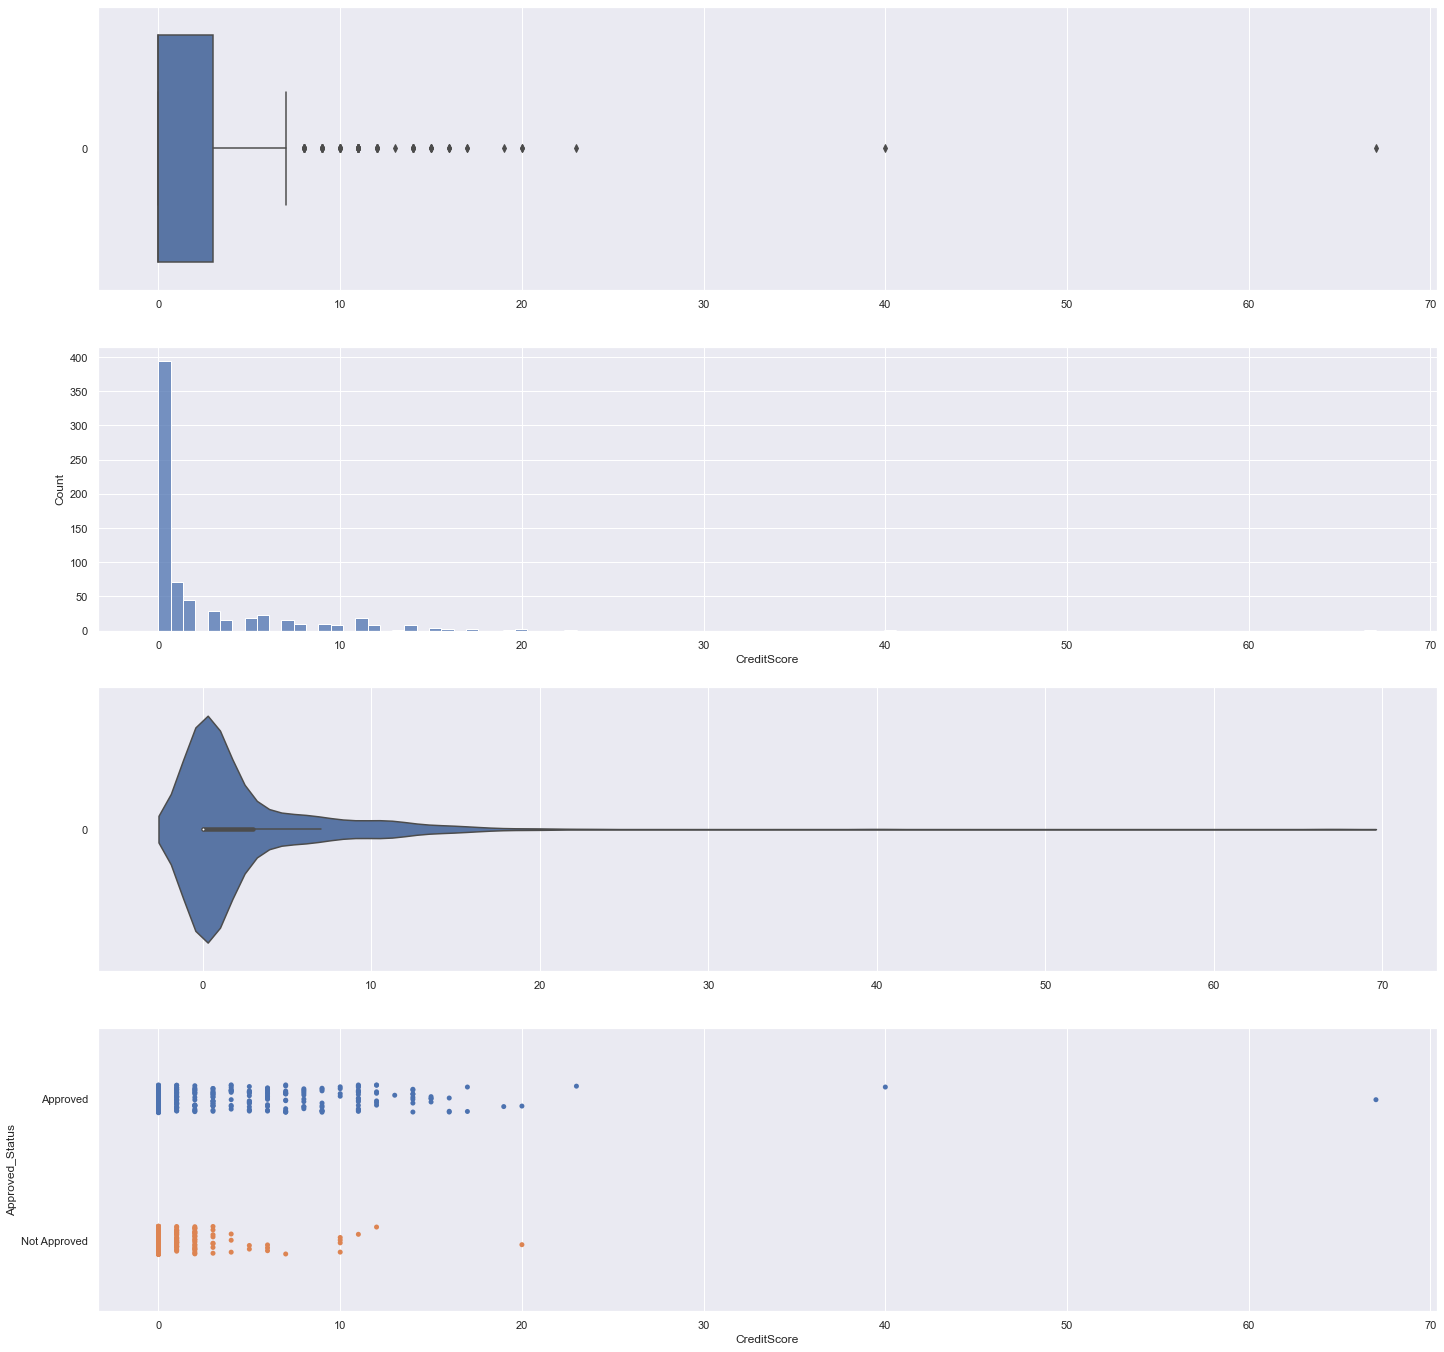

In [70]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['CreditScore'],orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['CreditScore'], ax = axes[1])
sb.violinplot(data = creditcardData['CreditScore'], orient = "h", ax = axes[2])
sb.stripplot(data=creditcardData,x="CreditScore",y="Approved_Status", ax = axes[3])

From the strip plot, it is obvious that there is a strong relationship between `CreditScore` and `Approved_Status`.

<AxesSubplot:xlabel='Income', ylabel='Approved_Status'>

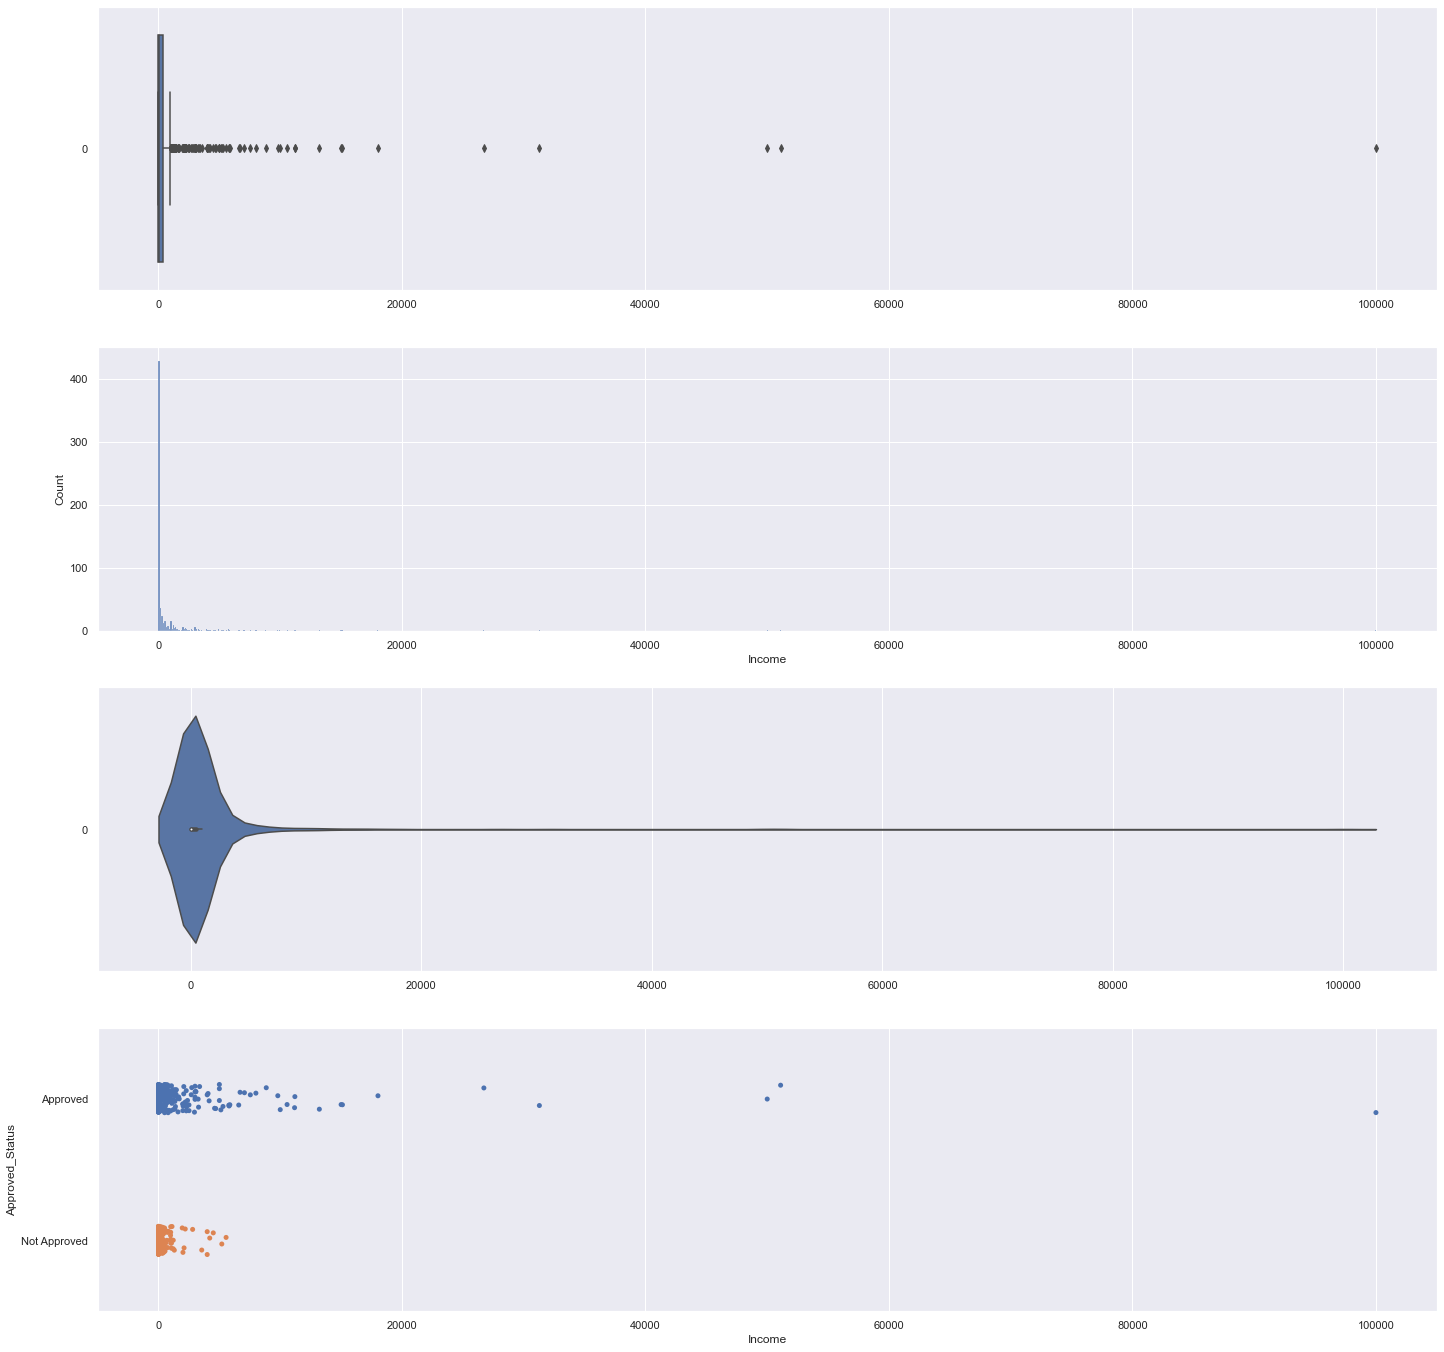

In [71]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Income'],orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Income'], ax = axes[1])
sb.violinplot(data = creditcardData['Income'], orient = "h", ax = axes[2])
sb.stripplot(data=creditcardData,x="Income",y="Approved_Status", ax = axes[3])

The plots do not scale well with the figsize due to the presence of a strong `Income` outliers. We will re-plot without the outliers just to better identify a trend.

<AxesSubplot:xlabel='Income', ylabel='Approved_Status'>

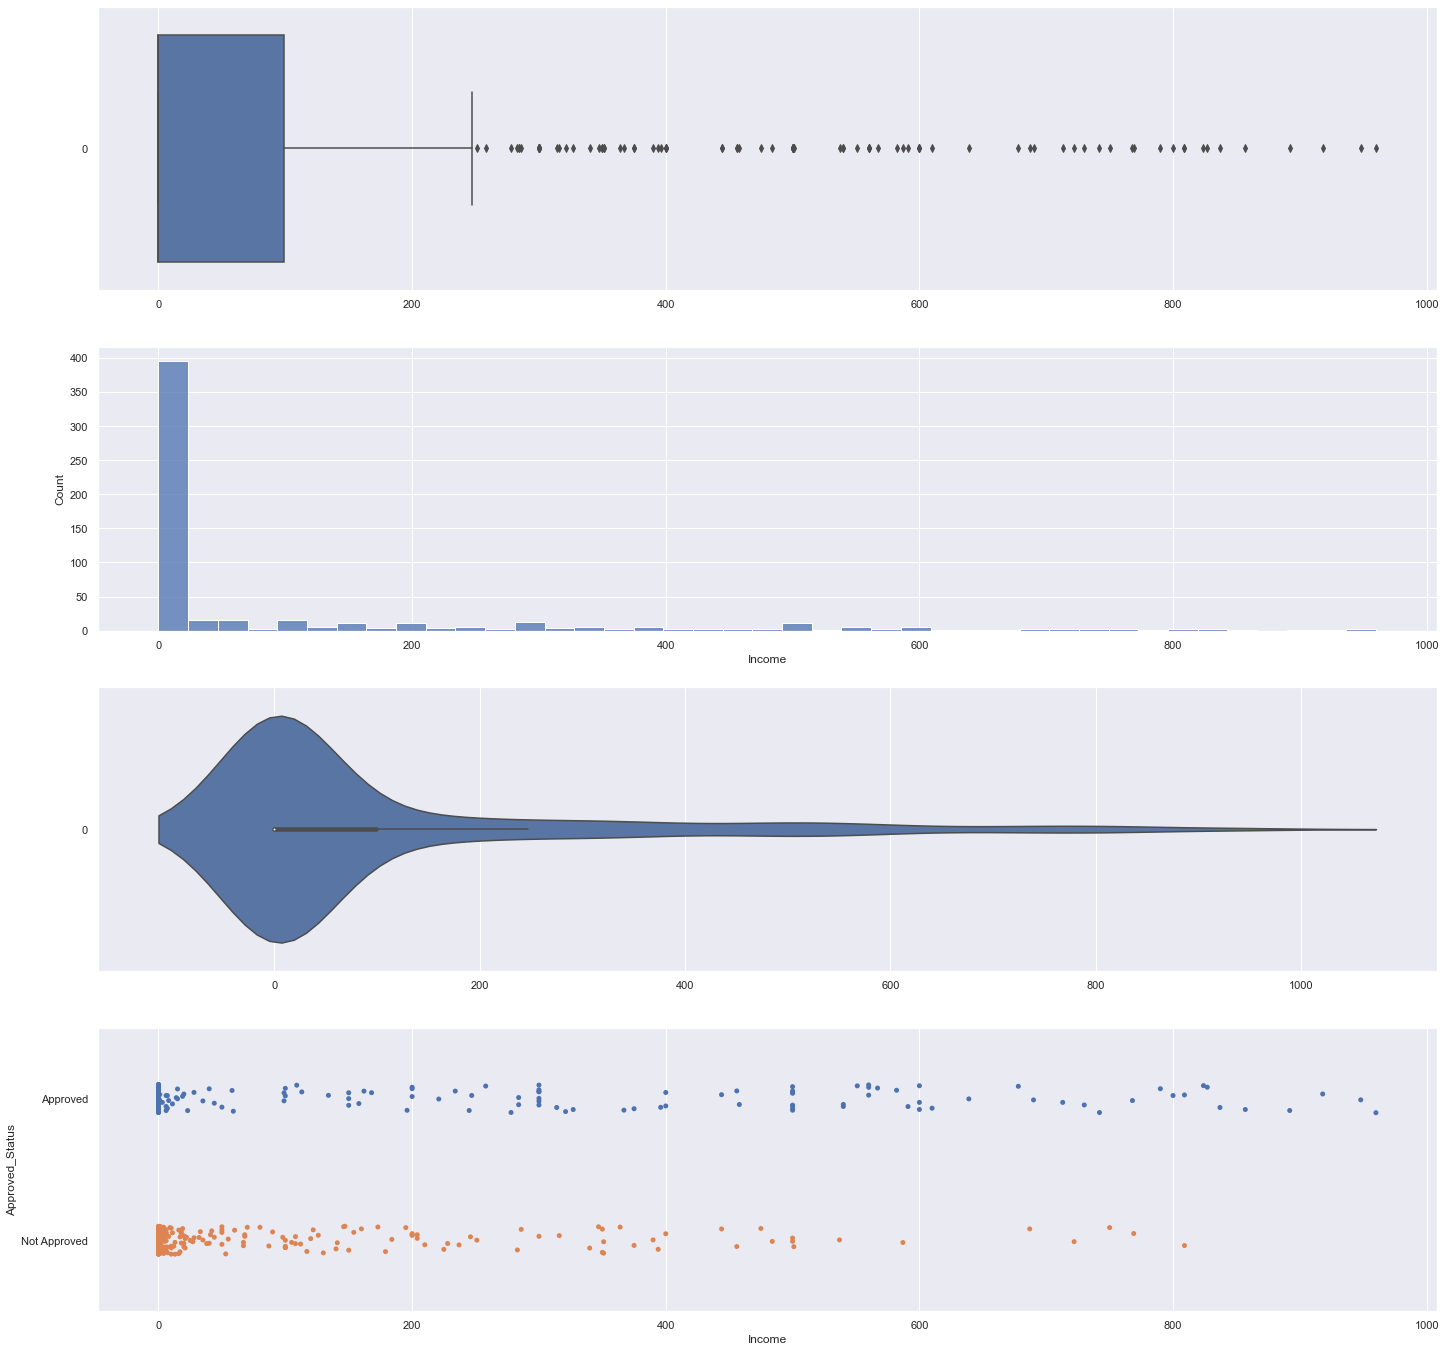

In [72]:
Q1 = creditcardData["Income"].quantile(0.25)
Q3 = creditcardData["Income"].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
IncomeMinusOutlier = creditcardData[(creditcardData["Income"] > lower_bound) & (creditcardData["Income"] < upper_bound)]
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = IncomeMinusOutlier['Income'],orient = "h", ax = axes[0])
sb.histplot(data = IncomeMinusOutlier['Income'], ax = axes[1])
sb.violinplot(data = IncomeMinusOutlier['Income'], orient = "h", ax = axes[2])
sb.stripplot(data=IncomeMinusOutlier,x="Income",y="Approved_Status", ax = axes[3])

From the strip plot, there seems to be a strong relationship between `Income` and `Approved_Status` as there are several more `Not Approved` applicants with a lower income.

#### Exploring the categorical variables

In [73]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [74]:
print("Discovering the values of Married")
creditcardData["Married"].value_counts()

Discovering the values of Married


u    519
y    163
l      2
Name: Married, dtype: int64

In [75]:
print("Discovering the values of Citizen")
creditcardData["Citizen"].value_counts()

Discovering the values of Citizen


g    625
s     57
p      8
Name: Citizen, dtype: int64

In [76]:
print("Discovering the values of EducationLevel")
creditcardData["EducationLevel"].value_counts()

Discovering the values of EducationLevel


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [77]:
print("Discovering the values of Ethnicity")
creditcardData["Ethnicity"].value_counts()

Discovering the values of Ethnicity


v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

Variables `EducationLevel` and `Ethnicity` have too many ambiguous values. After checking the dataset source, we know that most applicants do not want to disclose these sensitive information. Therefore, we will drop this variables out of our predictors.

In [78]:
# Drop EducationalLevel and Ethnicity
todrop=["EducationLevel","Ethnicity"]
ccData=creditcardData.drop(columns=todrop)
ccData.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+,Approved


Relationship between Gender and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Gender'>

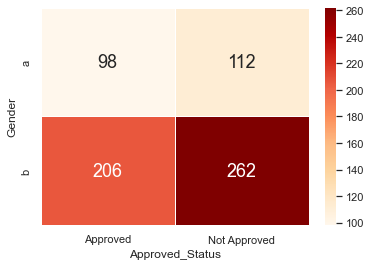

In [79]:
sb.heatmap(ccData.groupby(['Gender','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, it does not seem that `Gender` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between Married and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Married'>

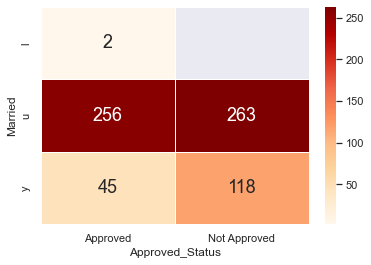

In [80]:
sb.heatmap(creditcardDataStr.groupby(['Married','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, while there are more `y` applicants who were not approved, the `u` applicants see a good balance. With further consideration, we deemed that `Married` should not strongly affect `Approved_Status`.

Relationship between Drivers License and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='DriversLicense'>

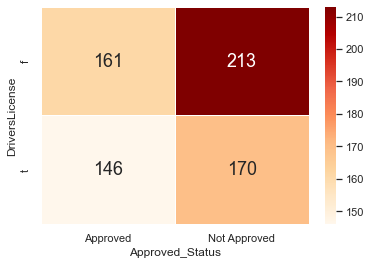

In [81]:
sb.heatmap(creditcardDataStr.groupby(['DriversLicense','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, it does not seem that `DriversLicense` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between Citizen and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Citizen'>

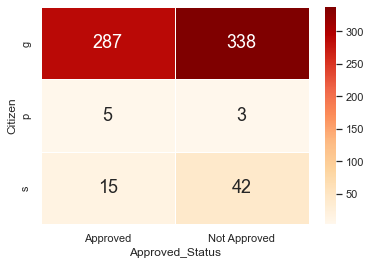

In [82]:
sb.heatmap(creditcardDataStr.groupby(['Citizen','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, it does not seem that `Citizen` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between PriorDefault and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='PriorDefault'>

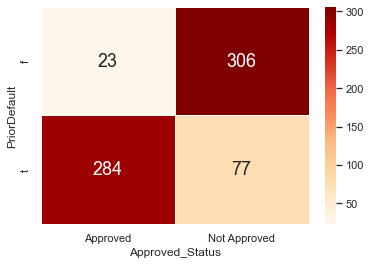

In [83]:
sb.heatmap(ccData.groupby(['PriorDefault','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

It is obvious that there is a very strong relationship with `PriorDefault` and `Approved_Status`, this variable should definitely be considered for model training.

Relationship between Employed and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Employed'>

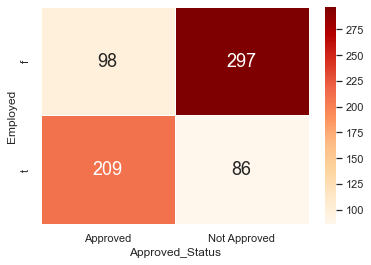

In [84]:
sb.heatmap(ccData.groupby(['Employed','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

Similarly, there is also a very strong relationship with `Employed` and `Approved_Status`, this variable should also be considered for model training.

---

## Essential Functions for model training 

Train test split

In [85]:
def train_test_split_func(X,y,test_size): # This function retunrs X_train,X_test,y_train,y_test as a list

    data = list(train_test_split(X,y,test_size=test_size))
    print(f'X_train: {data[0].shape}')
    print(f'X_test: {data[1].shape}')
    print(f'y_train: {data[2].shape}')
    print(f'y_test: {data[3].shape}')

    return data 

Random Forest

In [86]:
def randomforest( rforest, X_train,X_test, y_train,y_test):    
    rforest.fit(X_train,y_train.Approved_Status.ravel())
    y_train_pred = rforest.predict(X_train)    
    y_test_pred = rforest.predict(X_test)
    print("Train Data")
    print("Accuracy  :\t", rforest.score(X_train, y_train))    
    print()
    print("Test Data")
    print("Accuracy  :\t", rforest.score(X_test, y_test))    
    print()
    return y_train_pred,y_test_pred

Logisitic Regression

In [87]:
def logistic_regression(model,X_train,X_test,y_train,y_test):  # This function returns the y_train_predict and the y_test_predict
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = model.score(X_train,y_train)
    accuracy_test = accuracy_score(y_test,y_test_pred)

    print(f'Train Accuracy: {accuracy_train}')
    print(f" Test Accuracy: {accuracy_test}")
    return y_train_pred,y_test_pred 

Confusion matrix

In [88]:
def confusion_matrix_func(y_test,y_test_pred,type):

    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f", annot_kws={"size": 18})

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives 
    fpTest = cmTest[0][1] # False Positives 
    tnTest = cmTest[0][0] # True Negatives 
    fnTest = cmTest[1][0] # False Negatives 

    print(f"TPR {type} :\t", (tpTest/(tpTest + fnTest)))
    print(f"TNR {type} :\t", (tnTest/(tnTest + fpTest)))
    print()

    print(f"FPR {type} :\t", (fpTest/(fpTest + tnTest)))
    print(f"FNR {type} :\t", (fnTest/(fnTest + tpTest)))
    print()

    precision_test_rf = precision_score(y_test,y_test_pred, pos_label = 'Approved')
    recall_test_rf = recall_score(y_test,y_test_pred, pos_label = 'Approved')
    f1_test_rf = f1_score(y_test,y_test_pred, pos_label='Approved')
    print("Precision: {0:.4f}" .format(precision_test_rf)) 
    print("Recall: {0:.4f}" .format(recall_test_rf))
    print("F-score: {0:.4f}" .format(f1_test_rf))

### Seems like employed , prior_default , credit_score(num) , years_employed and debt(mayb) are those really important predictors as in this dataset

In [89]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Gender','Married','Employed','DriversLicense','PriorDefault','DriversLicense','Citizen']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_a          690 non-null    float64
 1   Gender_b          690 non-null    float64
 2   Gender_nan        690 non-null    float64
 3   Married_l         690 non-null    float64
 4   Married_u         690 non-null    float64
 5   Married_y         690 non-null    float64
 6   Married_nan       690 non-null    float64
 7   Employed_f        690 non-null    float64
 8   Employed_t        690 non-null    float64
 9   DriversLicense_f  690 non-null    float64
 10  DriversLicense_t  690 non-null    float64
 11  PriorDefault_f    690 non-null    float64
 12  PriorDefault_t    690 non-null    float64
 13  DriversLicense_f  690 non-null    float64
 14  DriversLicense_t  690 non-null    float64
 15  Citizen_g         690 non-null    float64
 16  Citizen_p         690 non-null    float64
 1

In [90]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['Age','YearsEmployed','Income','Debt','CreditScore']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 689
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               678 non-null    float64
 1   YearsEmployed     678 non-null    float64
 2   Income            678 non-null    int64  
 3   Debt              678 non-null    float64
 4   CreditScore       678 non-null    int64  
 5   Gender_a          678 non-null    float64
 6   Gender_b          678 non-null    float64
 7   Gender_nan        678 non-null    float64
 8   Married_l         678 non-null    float64
 9   Married_u         678 non-null    float64
 10  Married_y         678 non-null    float64
 11  Married_nan       678 non-null    float64
 12  Employed_f        678 non-null    float64
 13  Employed_t        678 non-null    float64
 14  DriversLicense_f  678 non-null    float64
 15  DriversLicense_t  678 non-null    float64
 16  PriorDefault_f    678 non-null    float64
 1

[Text(0.396875, 0.9166666666666666, 'PriorDefault_t <= 0.5\ngini = 0.497\nsamples = 474\nvalue = [219, 255]\nclass = Y'),
 Text(0.1625, 0.75, 'Debt <= 0.168\ngini = 0.135\nsamples = 220\nvalue = [16, 204]\nclass = Y'),
 Text(0.1, 0.5833333333333334, 'Age <= 26.875\ngini = 0.475\nsamples = 18\nvalue = [7, 11]\nclass = Y'),
 Text(0.075, 0.4166666666666667, 'Age <= 22.585\ngini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = N'),
 Text(0.05, 0.25, 'Gender_nan <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Y'),
 Text(0.025, 0.08333333333333333, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = Y'),
 Text(0.075, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Y'),
 Text(0.225, 0.5833333333333334, 'Married_l <= 0.5\ngini = 0.085\nsamples = 202\nvalue = [9, 193]\nclass = Y'),
 Text(0.2, 0.416666666666

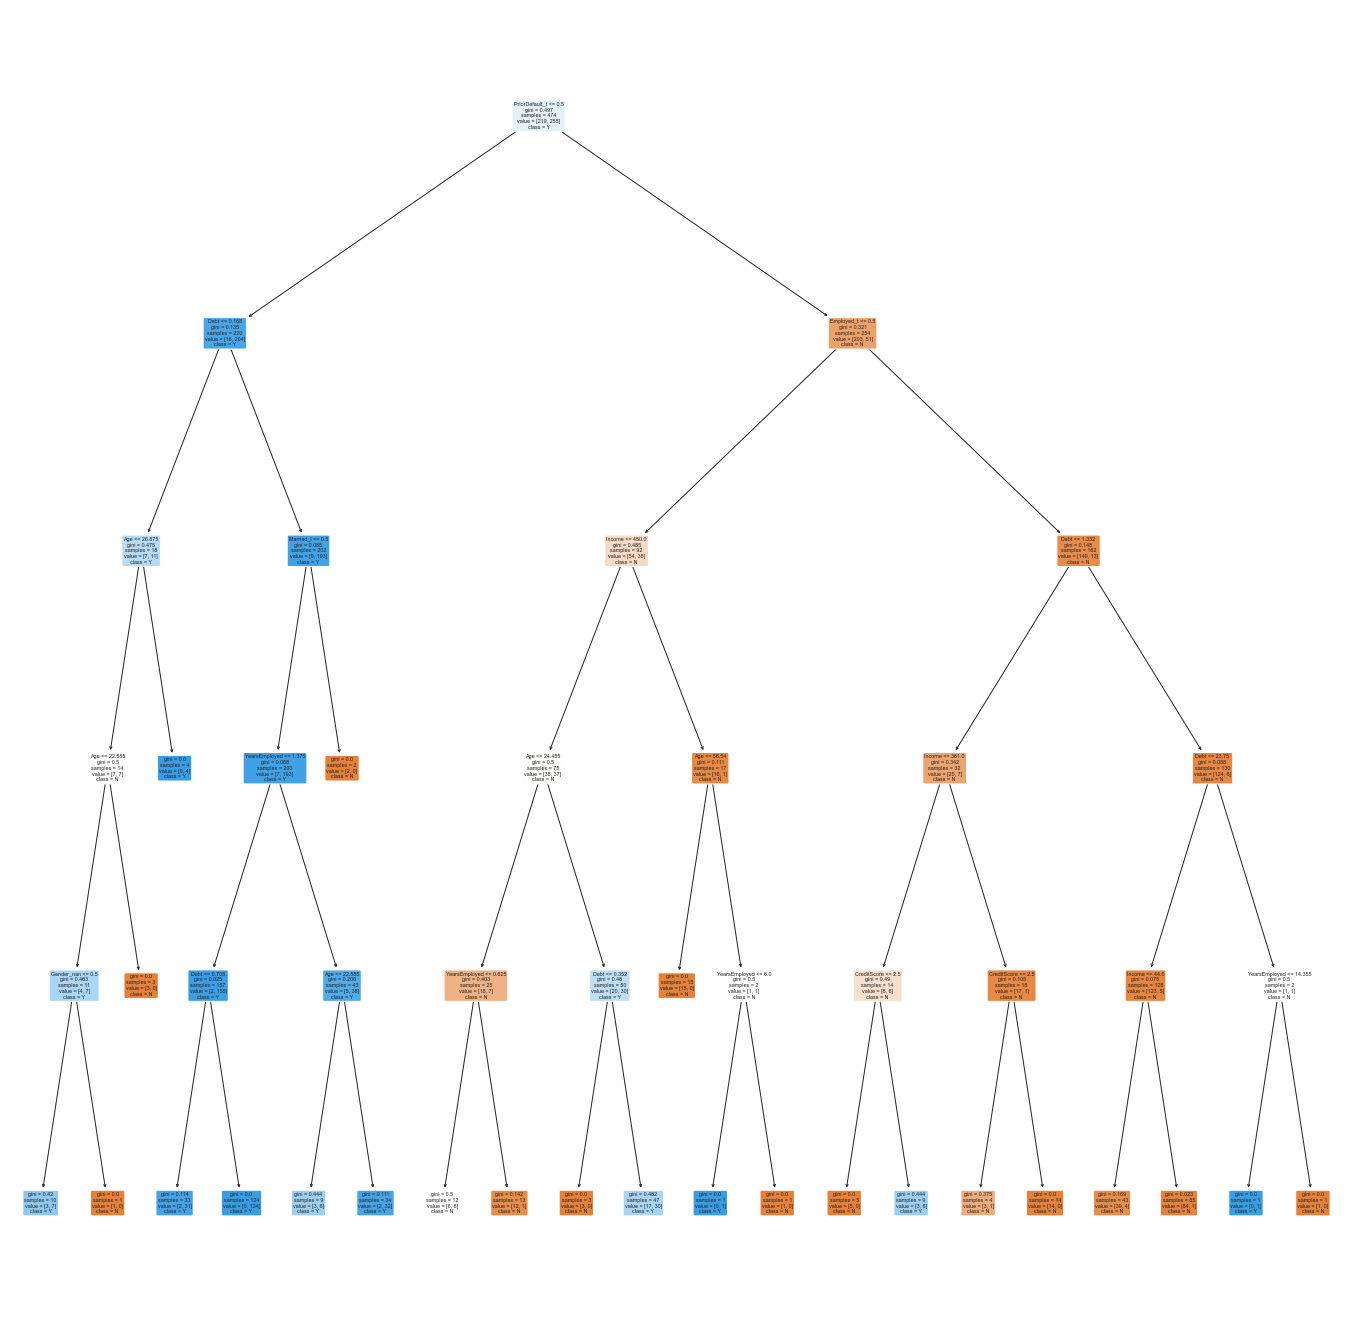

In [91]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9092827004219409

TPR Train :	 0.9490196078431372
TNR Train :	 0.863013698630137

FPR Train :	 0.136986301369863
FNR Train :	 0.050980392156862744

Precision: 0.9356
Recall: 0.8630
F-score: 0.8979


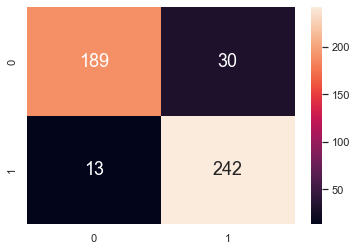

In [92]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
confusion_matrix_func(y_train,y_train_pred,'Train')

Test Data
Accuracy  :	 0.8186274509803921

TPR Test :	 0.8983050847457628
TNR Test :	 0.7093023255813954

FPR Test :	 0.29069767441860467
FNR Test :	 0.1016949152542373

Precision: 0.8356
Recall: 0.7093
F-score: 0.7673


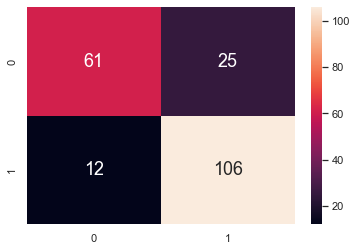

In [95]:
# Import the required metric from sklearn


# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

confusion_matrix_func(y_test,y_test_pred,'Test')

---

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=500, max_depth=5)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.9050632911392406

Test Data
Accuracy  :	 0.8676470588235294



TPR Train :	 0.8901960784313725
TNR Train :	 0.9223744292237442

FPR Train :	 0.0776255707762557
FNR Train :	 0.10980392156862745

Precision: 0.8783
Recall: 0.9224
F-score: 0.8998


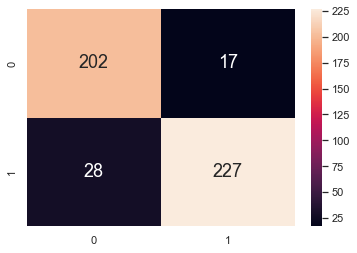

In [109]:
# Predict the Response corresponding to Predictors
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.847457627118644
TNR Test :	 0.8953488372093024

FPR Test :	 0.10465116279069768
FNR Test :	 0.15254237288135594

Precision: 0.8105
Recall: 0.8953
F-score: 0.8508


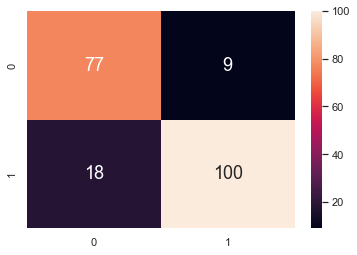

In [110]:
confusion_matrix_func(y_test,y_test_pred,'Test')

---

In [118]:
# Extract Response and Predictors
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [119]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Approved_Status.ravel())

KeyboardInterrupt: 

In [116]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=2, n_estimators=900)
0.8649944008958567


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=hpGrid.best_estimator_.n_estimators, max_depth=hpGrid.best_estimator_.max_depth)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.8713080168776371

Test Data
Accuracy  :	 0.8382352941176471



# -------------------------------------------------------------------

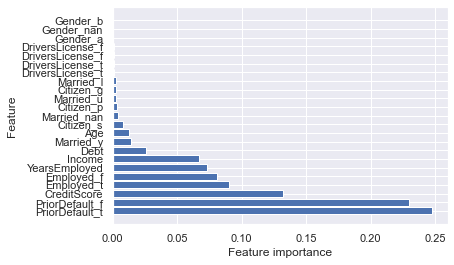

In [120]:
# Get feature importances
importances = rforest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create horizontal bar chart
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()


In [121]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Employed','PriorDefault']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employed_f      690 non-null    float64
 1   Employed_t      690 non-null    float64
 2   PriorDefault_f  690 non-null    float64
 3   PriorDefault_t  690 non-null    float64
dtypes: float64(4)
memory usage: 21.7 KB


In [122]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['CreditScore','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      690 non-null    int64  
 1   YearsEmployed    690 non-null    float64
 2   Income           690 non-null    int64  
 3   Debt             690 non-null    float64
 4   Employed_f       690 non-null    float64
 5   Employed_t       690 non-null    float64
 6   PriorDefault_f   690 non-null    float64
 7   PriorDefault_t   690 non-null    float64
 8   Approved_Status  690 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.6+ KB


In [123]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

rforest2 = RandomForestClassifier(n_estimators=500, max_depth=4)

y_train_pred,y_test_pred = randomforest( rforest2,X_train, X_test, y_train, y_test )
# rforest2.fit(X_train,y_train.Approved_Status.ravel())

Train Data
Accuracy  :	 0.8778467908902692

Test Data
Accuracy  :	 0.8792270531400966



TPR Train :	 0.8801498127340824
TNR Train :	 0.875

FPR Train :	 0.125
FNR Train :	 0.1198501872659176

Precision: 0.8552
Recall: 0.8750
F-score: 0.8650


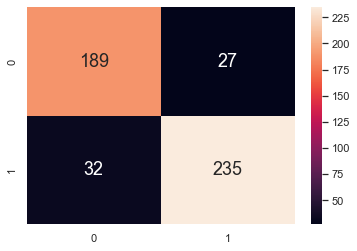

In [125]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.8793103448275862
TNR Test :	 0.8791208791208791

FPR Test :	 0.12087912087912088
FNR Test :	 0.1206896551724138

Precision: 0.8511
Recall: 0.8791
F-score: 0.8649


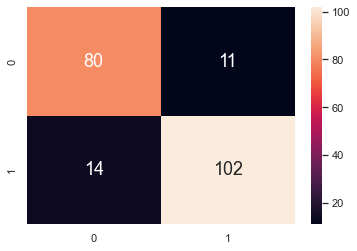

In [126]:
confusion_matrix_func(y_test,y_test_pred,'Test')

From here we found that Debt, Age, Income, YearsEmployed (num), Employed, PriorDefault(cat) are important factors.
Make Sense! 


In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Approved_Status.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=hpGrid.best_estimator_.n_estimators, max_depth=hpGrid.best_estimator_.max_depth)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

# ------------------------------------------------------------------------

# Logistic Regression

In [127]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Employed','PriorDefault']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))


ccData_num = ccData[['CreditScore','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)

y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

y = y.squeeze()

In [128]:
# Split the Dataset into Train and Test
X_train, X_test, y_train ,y_test =train_test_split(X,y,test_size=0.3)

In [129]:
# Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [130]:
X_train_scaled

array([[-0.04044149, -0.71755044, -0.16575674, ...,  1.13062013,
         1.04014256, -1.04014256],
       [-0.5755988 ,  0.39752585, -0.1857166 , ..., -0.88447036,
         1.04014256, -1.04014256],
       [-0.5755988 , -0.71755044,  0.80277156, ..., -0.88447036,
         1.04014256, -1.04014256],
       ...,
       [-0.5755988 , -0.31930891,  0.82140076, ..., -0.88447036,
        -0.96140667,  0.96140667],
       [ 0.22713716, -0.55825383,  0.00437728, ...,  1.13062013,
        -0.96140667,  0.96140667],
       [-0.5755988 ,  1.51260214, -0.18552651, ..., -0.88447036,
         1.04014256, -1.04014256]])

In [131]:
model = LogisticRegression()
y_train_pred,y_test_pred =  logistic_regression(model,X_train_scaled,X_test_scaled,y_train,y_test)

Train Accuracy: 0.8592132505175983
 Test Accuracy: 0.855072463768116


TPR Train :	 0.8171641791044776
TNR Train :	 0.9116279069767442

FPR Train :	 0.08837209302325581
FNR Train :	 0.1828358208955224

Precision: 0.8000
Recall: 0.9116
F-score: 0.8522


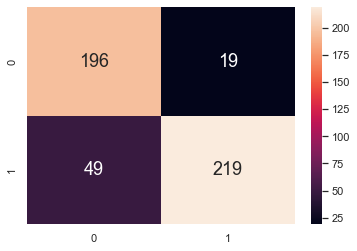

In [132]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.7913043478260869
TNR Test :	 0.9347826086956522

FPR Test :	 0.06521739130434782
FNR Test :	 0.20869565217391303

Precision: 0.7818
Recall: 0.9348
F-score: 0.8515


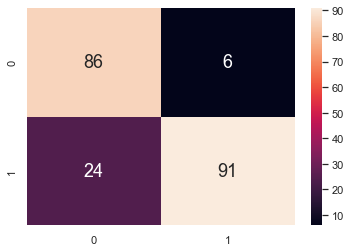

In [133]:
confusion_matrix_func(y_test,y_test_pred,'Test')

Scaled

----

## Additional Model (Resampling)

In [143]:
Approved = ccData_ohe[ccData_ohe.Approved_Status == 'Approved']
Not_Approved = ccData_ohe[ccData_ohe.Approved_Status == 'Not Approved']
 
# Upsample the Bad samples
Not_Approved_up = resample(Not_Approved, 
                        replace=True,                     # sample with replacement
                        n_samples=Approved.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
creditData_ohe_up = pd.concat([Approved, Not_Approved_up])
 
# Check the ratio of the classes
creditData_ohe_up['Approved_Status'].value_counts()

Approved        307
Not Approved    307
Name: Approved_Status, dtype: int64

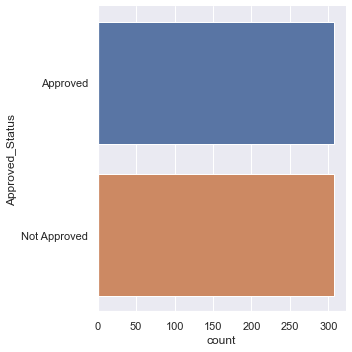

In [144]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Approved_Status', data = creditData_ohe_up, kind = "count")

In [145]:
# Confirm that the OHE is still in place
# and that the samples have now increased
creditData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 386
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      614 non-null    int64  
 1   YearsEmployed    614 non-null    float64
 2   Income           614 non-null    int64  
 3   Debt             614 non-null    float64
 4   Employed_f       614 non-null    float64
 5   Employed_t       614 non-null    float64
 6   PriorDefault_f   614 non-null    float64
 7   PriorDefault_t   614 non-null    float64
 8   Approved_Status  614 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.0+ KB


[Text(0.5431034482758621, 0.9, 'PriorDefault_f <= 0.5\ngini = 0.5\nsamples = 429\nvalue = [217, 212]\nclass = Approved'),
 Text(0.27586206896551724, 0.7, 'CreditScore <= 0.5\ngini = 0.33\nsamples = 254\nvalue = [201, 53]\nclass = Approved'),
 Text(0.13793103448275862, 0.5, 'Income <= 450.0\ngini = 0.494\nsamples = 99\nvalue = [55, 44]\nclass = Approved'),
 Text(0.06896551724137931, 0.3, 'Debt <= 0.312\ngini = 0.499\nsamples = 82\nvalue = [39, 43]\nclass = Not_Approved'),
 Text(0.034482758620689655, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Approved'),
 Text(0.10344827586206896, 0.1, 'gini = 0.493\nsamples = 77\nvalue = [34, 43]\nclass = Not_Approved'),
 Text(0.20689655172413793, 0.3, 'Debt <= 0.418\ngini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = Approved'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not_Approved'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = Approved'),
 Text(0.4137931034482

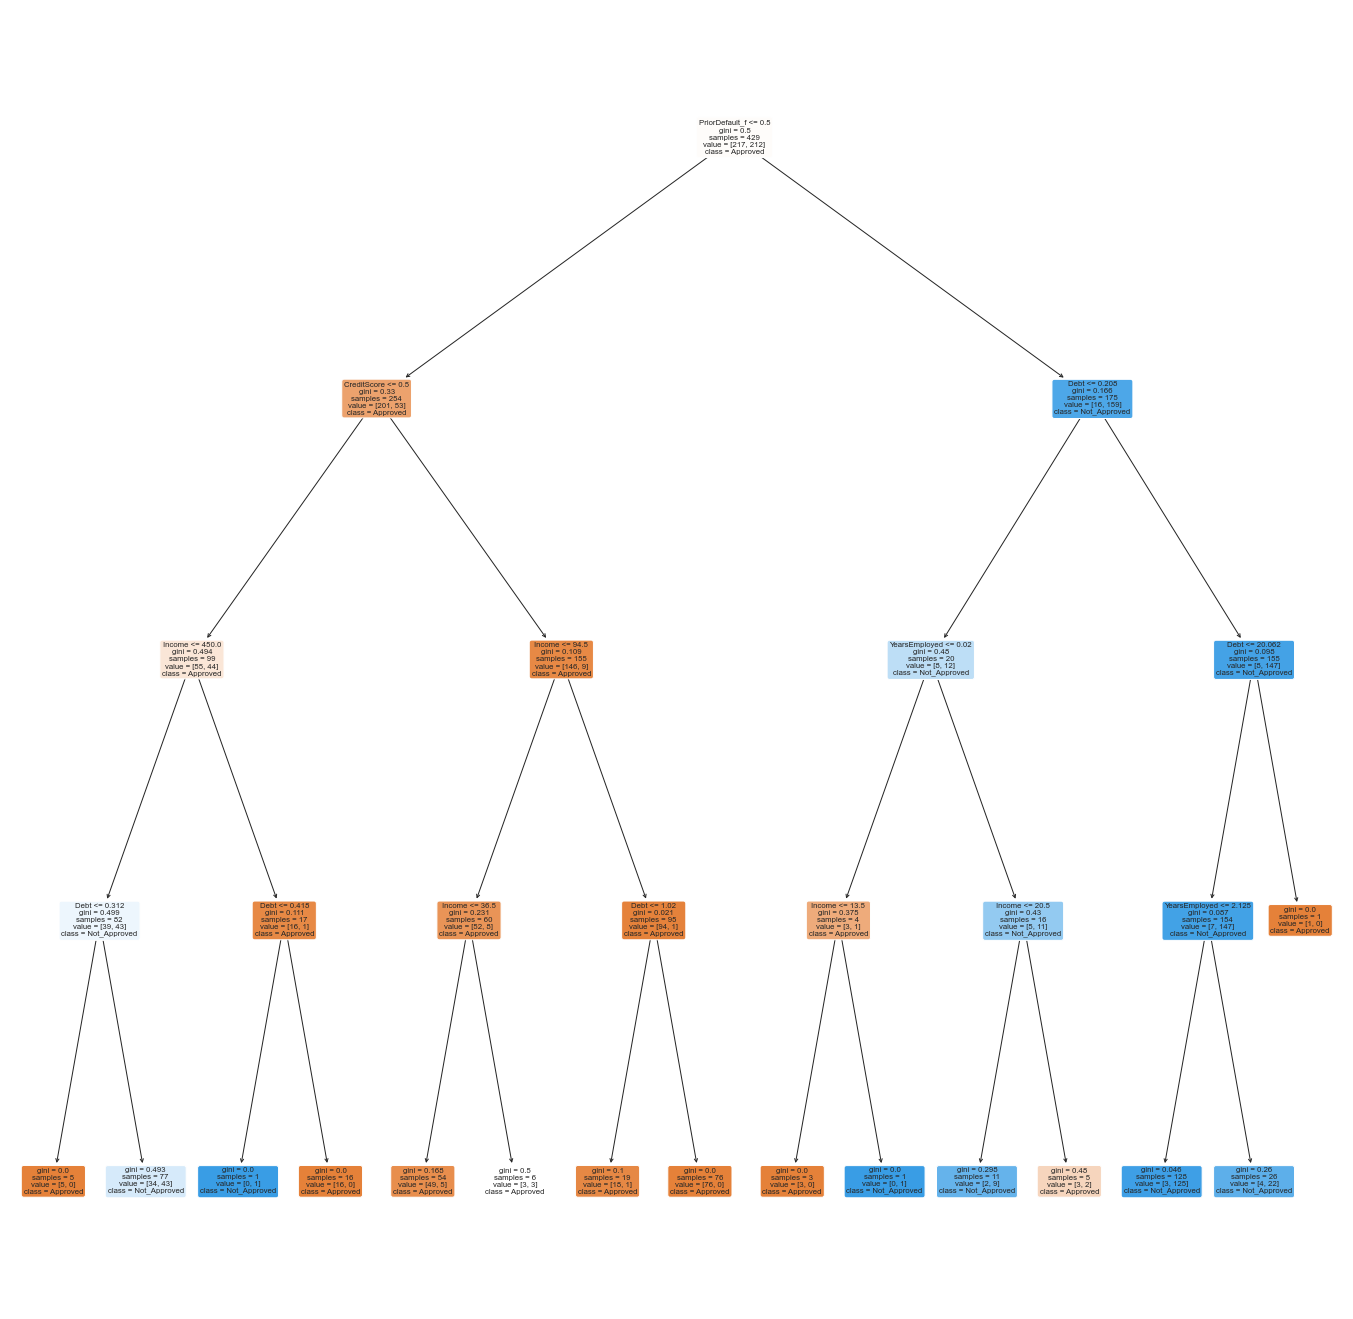

In [155]:
# Extract Response and Predictors
y = pd.DataFrame(creditData_ohe_up['Approved_Status'])
X = pd.DataFrame(creditData_ohe_up.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Approved","Not_Approved"])

Train Data
Accuracy  :	 0.8741258741258742

TPR Train :	 0.9481132075471698
TNR Train :	 0.8018433179723502

FPR Train :	 0.19815668202764977
FNR Train :	 0.05188679245283019

Precision: 0.9405
Recall: 0.8018
F-score: 0.8657


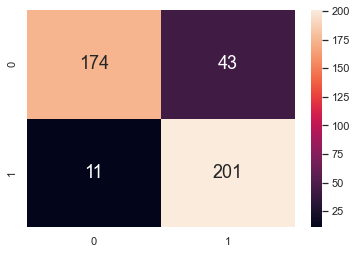

In [156]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

confusion_matrix_func(y_train,y_train_pred,'Train')

Test Data
Accuracy  :	 0.8324324324324325

TPR Test :	 0.9052631578947369
TNR Test :	 0.7555555555555555

FPR Test :	 0.24444444444444444
FNR Test :	 0.09473684210526316

Precision: 0.8831
Recall: 0.7556
F-score: 0.8144


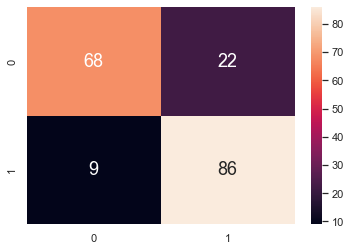

In [157]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

confusion_matrix_func(y_test,y_test_pred,'Test')

#### After applying resampling test accuracy went up by ~2% ( but train accuracy went down ~ 2%?) while TPR and TNR increased significantly (train accuracy went down ~ 2%?)